## ENG07086 - Termodinâmica e Transferência de Calor
### Exercício Computacional 2 (Unidade 4) - Ciclo Térmico com Reaquecimento

### Construa um notebook com dashboard para um ciclo de Rankine com reaquecimento conforme o diagrama abaixo.

<img src="Imagem Ciclo com Reaquecimento.png">

Ciclo de Rankine com reaquecimento

#### Os dados do ciclo são dados no arquivo "dataset_ciclo_com_reaquecimento.csv"

#### Observações:
#### - veja que neste ciclo o trabalho produzido na turbina e o calor recebido na caldeira possuem duas parcelas
#### - considere que a temperatura após o reaquecimento é igual à temperatura após a primeira passagem na caldeira


In [474]:
# Carregando os pacotes do Python
import numpy as np

#T3 = T5
#S4 = S3
#P1 = P6
#P2 = P3
#P4 = P5
#S2 = S1

# W bomba = h2 - h1
# W turbina = (h4 - h3) + (h6 - h5)

In [475]:
# Importando as bibliotecas do CoolProp
import CoolProp as CP
from CoolProp.CoolProp import PropsSI
# Selecionando o fluido
fluido = 'Water'

In [476]:
def pegapropriedades(Pressure = None, Temperature = None, Fluido = None):
    
    if not Temperature: # Fluido saturado - um grau de liberdade
        T = PropsSI('T', 'P', Pressure*1e5, 'Q', 0, Fluido)
        temperature = T
        slat = PropsSI('S', 'P', Pressure*1e5, 'Q', 0, Fluido) / 1000. # entropia do liquido saturado em kJ/kg/K
        svat = PropsSI('S', 'P', Pressure*1e5, 'Q', 1, Fluido) / 1000. # entropia do vapor saturado em kJ/kg/K
        entropy = [slat, svat]

        hlat = PropsSI('H', 'P', Pressure*1e5, 'Q', 0, Fluido) / 1000. # entalpia do liquido saturado em kJ/kg
        hvat = PropsSI('H', 'P', Pressure*1e5, 'Q', 1, Fluido) / 1000. # entalpia do vapor saturado em kJ/kg

        enthalpy = [hlat, hvat]
    
    else:
        temperature = Temperature + 273.15
        entropy = PropsSI('S', 'P', Pressure*1e5, 'T', temperature, Fluido)/1000. #kJ/kg/K
        enthalpy = PropsSI('H', 'P', Pressure*1e5, 'T', temperature, Fluido) /1000. #kJ/kg

    
    return enthalpy, entropy, temperature 

### Definição da Função rendimento

In [477]:
# Definindo a função de rendimento
def rendimento(P3, T3, P4, P6):
    P2 = P3
    T5 = T3
    P1 = P6
    P5 = P4

    h1 = PropsSI('H', 'P', P1*1e5, 'Q', 0, fluido)/1000. # kJ/kg
    s1 = PropsSI('S', 'P', P1*1e5, 'Q', 0, fluido)/1000. # kJ/kg/K
    s2 = s1

    h2 = PropsSI('H', 'P', P2*1e5, 'S', s2*1000, fluido)/1000.
    
    h3, s3, t3 = pegapropriedades(Pressure=P3, Temperature=T3 + 273.15, Fluido=fluido)
    s4 = s3
    h4 = PropsSI('H', 'P', P4*1e5, 'S', s4*1000, fluido)/1000.
    h5, s5, t5 = pegapropriedades(Pressure=P5, Temperature=T5 + 273.15, Fluido=fluido)
    s6 = s5
    h6 = PropsSI('H', 'P', P6*1e5, 'S', s6*1000, fluido) /1000.

    qq = (h3 - h2) + (h5 - h4)
    wb = h2 - h1
    wt = (h4 - h3) + (h6 - h5)
    wliq = abs(wt) - abs(wb)

    rend = wliq/qq
    
    return rend

In [478]:
# Carregando aquivos de dados
import pandas as pd

dados = pd.read_csv('dataset_ciclo_com_reaquecimento.csv', sep=';', encoding='latin1')

In [479]:
# Rodando função de rendimento para o dataset

rend = np.zeros(len(dados.P3))
for i in range(1, len(rend)-1):
    P3 = P2 = float(dados['P3'][i])
    T3 = T5 = float(dados['T3'][i])
    P1 = P6 = float(dados['P1'][i])
    P4 = P5 = float(dados['P4'][i])
    rend[i] = rendimento(P3, T3, P4, P6)

dados_rend = dados
dados_rend['Rendimento'] = rend
dados_rend.loc[0, "Rendimento"] = ''

/tmp/ipykernel_15405/419107543.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [480]:
# Gráfico estático
from matplotlib import pyplot as plt
plt.figure(num=None,figsize=(12,8),facecolor='w',edgecolor='k')

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

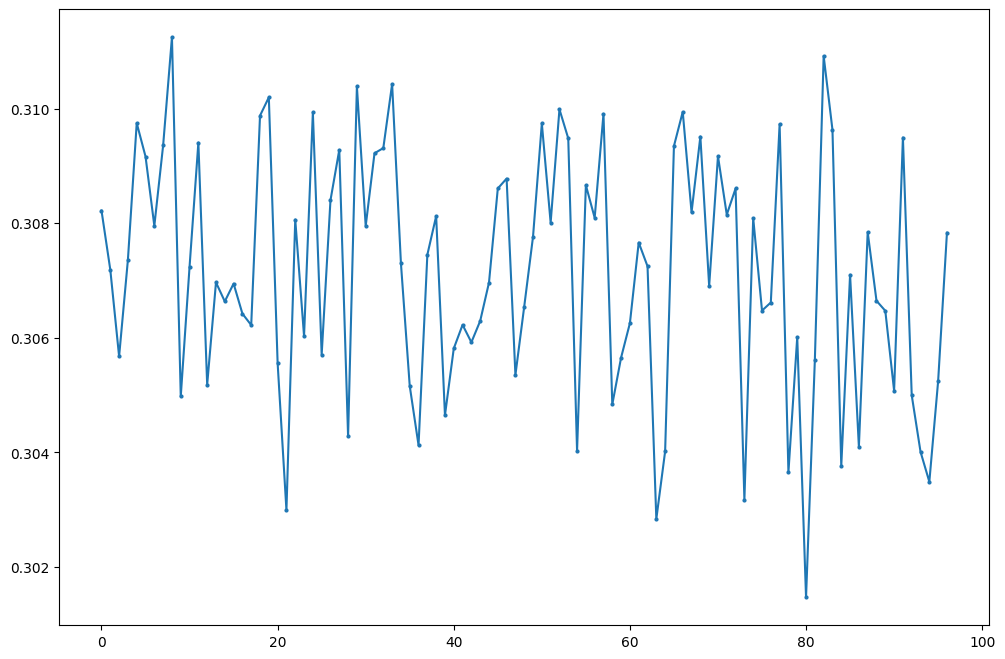

In [481]:
# Criando um dashboard simples
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(num=None,figsize=(12,8),facecolor='w',edgecolor='k')
plt.plot(rend[1:-1],marker='o',markersize = 2)
plt.show()

In [ ]:
# Criando um dashboard cool

import plotly.graph_objects as go
import pandas as pd

def grafico_legal_plotly(x, y, titulo="Gráfico Legal", tema="plotly_dark", x_label="Eixo X", y_label="Eixo Y"):
    """
    Gera um gráfico de linha interativo usando Plotly.

    Parâmetros:
        x (list): Lista com os valores do eixo X (categorias ou datas).
        y (list): Lista com os valores do eixo Y (números).
        titulo (str): Título do gráfico.
        tema (str): Tema do gráfico (ex: 'plotly', 'plotly_dark', etc.).
        x_label (str): Rótulo do eixo X.
        y_label (str): Rótulo do eixo Y.
    """

    # Verifica se os dados têm o mesmo comprimento
    if len(x) != len(y):
        raise ValueError("As listas 'x' e 'y' devem ter o mesmo comprimento.")

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        name='Dados',
        line=dict(color='cyan', width=3),
        marker=dict(size=10, color='white', line=dict(width=2, color='cyan'))
    ))

    fig.update_layout(
        title=titulo,
        template=tema,
        xaxis_title=x_label,
        yaxis_title=y_label,
        font=dict(family="Arial", size=14),
        plot_bgcolor="rgba(0,0,0,0)",
        paper_bgcolor="rgba(0,0,0,0)",
        hovermode="x unified",
    )

    fig.show()

y = dados_rend['Rendimento'][1:-1]
x = dados_rend['Time'][1:-1]
grafico_legal_plotly(x, y, "Ciclo Térmico com Reaquecimento", x_label= 'Tempo', y_label= 'Rendimento' )
